# Algorithm算法

## Big O Notation

### 一、$O(1)$

In [13]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [14]:
from time import clock

def timer(f):
    def _f(*args):
        t0 = clock()
        f(*args)
        return clock() - t0
    return _f

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline  

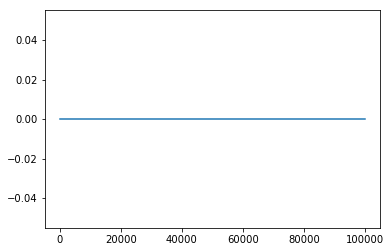

In [43]:
def square(x):
    import time
    start = time.time()
    t = time.time() - start
    return x,t

rst=list(map(square,range(100,100000,100)))
x=list(zip(*rst))[0]
y = list(zip(*rst))[1]
plt.plot(x, y)

### 二、 $O(n)$

### 1.循环1次，寻找最大值

In [48]:
def find_max(l):
    import time
    start = time.time()
    
    if l == None:
        return None
    mx = l[0]
    for n in l:
        if n > mx:
            mx = n
            
    t = time.time() - start   ##函数运行的时间
    
    return len(l), t


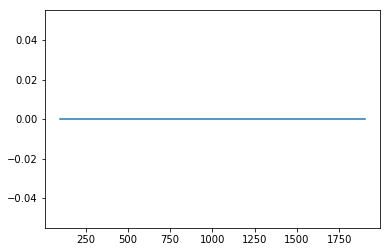

In [54]:
import random

random_lists = [[int(1000*random.random()) for i in range(100 * n)] for n in range(1, 20)] ##每次增加100，共1000个
rst = [find_max(l) for l in random_lists]    

x=list(zip(*rst))[0]
y = list(zip(*rst))[1]
plt.plot(x, y)
## 时间变化不大

### 三、 $O(n^2)$

In [52]:
#判断是否数字重复使用了（不用dictionary）
def has_duplicate(l):
    import time
    start = time.time()
    
    rst = False
    for i in range(len(l)):             ##两个for，逐个比较 i=0,j n i=1 j=n-1......循环n(n+1)/2,所以是n**2
        for j in range(i + 1, len(l)):
            if l[i] == l[j]:
                rst = True
        
    t = time.time() - start
    
    return rst, len(l), t

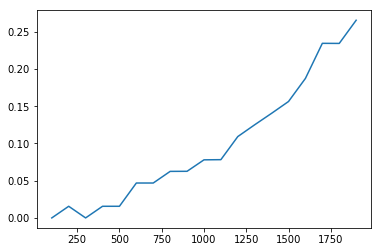

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline  
rst = [has_duplicate(l) for l in random_lists]

x = list(zip(*rst))[1]       ##长度
y = list(zip(*rst))[2]      ##时间增长很快

plt.plot(x, y)

In [36]:
##### 快捷方法
f=[0,1]
def _f(n):
    if n==0:
        return 0
    elif n==1:
        return 1
    else:
        f=[0,1]
        for i in range(1,n-1):
            f.append(f[i]+f[i-1])
        return f[n-1]
timer(_f)(6)
timer(_f)(35)        

7.694415444348124e-06

3.0777661720549077e-05

## 典型例题

## 1.Fibonacci  递归，函数中套用自身 
#### $f(n)=f(n-1)+f(n-2)$ 0,1,1,2,3,5,8,13,21,,,,
##### $f(5)=f(4)+f(3)
           =f(4)+f(3)+f(2)
           =f(4)+f(3)+f(2)+f(1)
           =f(4)+f(3)+f(2)+f(1)+f(0)$
      其中f(1)就计算了2^n,树状图
      

In [56]:
#-------------o(1)
f=[0,1]
def _f(n):
    if n==0:
        return 0
    elif n==1:
        return 1
    else:
        f=[0,1]
        for i in range(1,n-1):
            f.append(f[i]+f[i-1])
        return f[n-1]
timer(_f)(6)
timer(_f)(35) 

7.266949978657067e-06

3.206006658729166e-05

In [57]:
##-----------o(n)
def fibonacci2(n):
    assert(n>=0)
    a, b = 0, 1
    for i in range(1, n+1):
        a, b = b, a+b      
    return a 
timer(fibonacci2)(6)
timer(fibonacci2)(35) 

6.412010407075286e-06

1.496136246714741e-05

In [59]:
##-----------o(2^n)
def fibonacci(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:                                      ##函数套函数
        return fibonacci(n-1) + fibonacci(n-2)  ##两个都会计算

timer(fibonacci)(6)
timer(fibonacci)(35)  ##很慢

1.2824020814150572e-05

7.662189086840954

In [ ]:
#递归reclution o(n) 有上限
def fibonacci3(n):
    assert(n>=0)  #判断，也可以用if
    if (n <= 1): 
        return (n,0)
    (a, b) = fibonacci3(n-1)    
    return (a+b, a)
fibonacci3(980)##会报错，非常消耗内存

## 2.查找Binary Search---
##### 在list 中找是否存在某数，有返回index，无输出-1

In [60]:
##----------------o(n)----list未排序
    # If empty
def search(num_list, val):  
    if num_list == None:
        return -1  
    for i in range(0, len(num_list)):##for 循环的次数随着list的大小而变化，不一定要排序
        if (num_list[i] == val):
            return i
    return -1
num_list = [1,2,3,5,7,8,9]
print(search(num_list, 7))
print(search(num_list, 4))

4
-1


In [61]:
###--------------o(1)二分法----list排好了
def bi_serach_re(num_list, val):
    def bi_search(l, h):
        # Not found
        if l > h:
            return -1
        
        # Check mid
        mid = (l + h) // 2
        if (num_list[mid] == val):
            return mid;
        elif (num_list[mid] < val):
            return bi_search(mid + 1, h)
        else:
            return bi_search(l, mid - 1)
        
    return bi_search(0, len(num_list))
num_list = [1,2,3,5,7,8,9]
print(bi_serach_re(num_list, 7))
print(bi_serach_re(num_list, 4))


4
-1


In [62]:
## -------------olog(n)------------2分法 排好序的
def bi_search_iter(num_list, val):
    l = 0
    h = len(num_list)
    while (l <= h):
        mid = (l + h) // 2
        if (num_list[mid] == val):
            return mid
        elif (num_list[mid] < val):
            l = mid + 1
        else:
            h = mid - 1
    return -1
num_list = [1,2,3,5,7,8,9]
print(bi_search_iter(num_list, 7))
print(bi_search_iter(num_list, 4))

4
-1


### 2.2 若有重复的数据，查找的是中间的数，若我们想找第一个出现的，或者最后一个，该怎么找

## 3.排序
#### 1.冒泡排序Buble Sort
#####  就是最大值冒泡到最后


In [64]:
##------------------o(n^2)  
def _bubble_sort(nums: list, reverse=False):
    import time
    start = time.time()
    for i in range(len(nums)):
        # Get (i+1) largest in the correct position
        for j in range(len(nums) - i - 1):  ##range(i+1,len(nums))
            if nums[j] > nums[j + 1]:
                nums[j], nums[j + 1] = nums[j + 1], nums[j]
    if reverse:
        #nums = nums[::-1]  # why this is not working?
        nums.reverse()
    t = time.time() - start
    return len(nums), t
l = [1, 3, 5, 7, 9, 2, 4, 6, 8, 0]
l = _bubble_sort(l, reverse=True)
print(l)

(10, 0.0)


In [ ]:
x = list(zip(*rst))[0]
y = list(zip(*rst))[1]

plt.plot(x, y)

In [16]:
import arrayutil
mylist = arrayutil.generateRandomArray(10000)

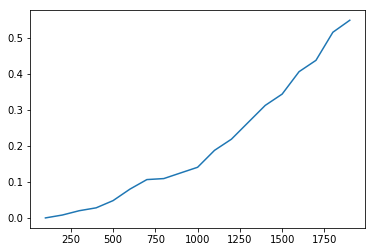

In [80]:
random_lists = [arrayutil.generateRandomArray(100 * n) for n in range(1, 20)]
rst = [_bubble_sort(l) for l in random_lists]
x = list(zip(*rst))[0]
y = list(zip(*rst))[1]

plt.plot(x, y)

In [ ]:
#最优，假设已经排好的情况
def bubble_sort_mod(array):
    import time
    start = time.time()    
    for i in range(len(array)): # n pass
        is_sorted = True  # initialize is_sorted
        for j in range(1, len(array) - i):
            if (array[j] < array[j - 1]):
                # swap
                array[j], array[j - 1] = array[j - 1], array[j]
                is_sorted = False
        
        if (is_sorted): break
    t = time.time() - start
    return len(array), t    

## 3.排序
#### 2.插入排序Insert Sort
#### 从左插入：range（0，i）
#### 从右插入：range(1,len(items)) 从index=1开始，一个一个与前面的比较大小，若前面的大，则交换位置，知道前面没有比其更大的数，


In [81]:
### 用的频率更多，虽然也是o(n^2)但要快得多
def insert_sort(items):
    import time
    start = time.time()
    for sort_inx in range(1,len(items)):
        unsort_inx = sort_inx
        while unsort_inx > 0 and items[unsort_inx-1] > items[unsort_inx]:
            items[unsort_inx-1], items[unsort_inx] = items[unsort_inx], items[unsort_inx-1]
            unsort_inx = unsort_inx-1  #啥意思
    t = time.time() - start
    return len(items), t            

In [82]:
random_lists = [arrayutil.generateRandomArray(100 * n) for n in range(1, 20)]

rst = [insert_sort(l) for l in random_lists]

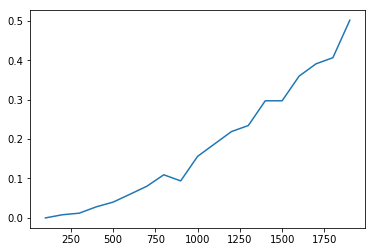

In [83]:
x = list(zip(*rst))[0]
y = list(zip(*rst))[1]

plt.plot(x, y)

## 3.排序
#### 3.插入排序selection sort
#### 找最小值

In [ ]:
def selection_sort(nums:list, reverse=False):
    min_inx=0
    for i in range(len(nums)):
        for j in range(i+1,len(nums)):
            if nums[min_inx]<nums[i]:
                min_inx=i
        nums[min_inx],nums[i]=nums[i],nums[min_inx]  ##在一轮for循环结束后，再进行交换


## 3.排序
#### 4.插入排序Merge sort ------------------ nlogn
#### l.sort（）是insertion sort+merge
#### 分治法

In [11]:
def _merge(a: list, b: list) -> list:
    """Merge two sorted list"""
    c = []
    while len(a) > 0 and len(b) > 0:
        if a[0] < b[0]:
            c.append(a[0])
            a.remove(a[0])
        else:
            c.append(b[0])
            b.remove(b[0])

    if len(a) == 0:
        c += b
    else:
        c += a
    return c


def _merge_sorted(nums: list) -> list:
    # Won't sort in place
    if len(nums) <= 1:
        return nums

    m = len(nums) // 2
    a = _merge_sorted(nums[:m])
    b = _merge_sorted(nums[m:])
    return _merge(a, b)


# Wrapper
def merge_sorted(nums: list, reverse=False) -> list:
    import time
    start = time.time()
    """Merge Sort"""
    nums = _merge_sorted(nums)
    if reverse:
        nums = nums[::-1]

    t = time.time() - start
    return nums, len(nums), t

l = [1, 3, 5, 7, 9, 2, 4, 6, 8, 0]
l = merge_sorted(l, reverse=True)[0]
print(l)

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


In [18]:
random_lists = [arrayutil.generateRandomArray(100 * n) for n in range(1, 51)]
rst = [merge_sorted(l) for l in random_lists]
r = [(l[1],l[2]) for l in rst]

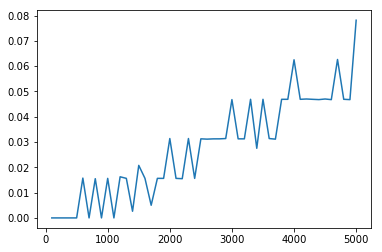

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline  

x = list(zip(*r))[0]
y = list(zip(*r))[1]

plt.plot(x, y)

## 3.排序
#### 4. Quick Sort  
#### n^2,如果pivot选的好，这可以将其分为一半一半，类似merge sort

In [20]:
def _quick_sorted(nums: list) -> list:
    if len(nums) <= 1:
        return nums

    pivot = nums[0]
    left_nums = _quick_sorted([x for x in nums[1:] if x < pivot])
    right_nums = _quick_sorted([x for x in nums[1:] if x >= pivot])
    return left_nums + [pivot] + right_nums##需要空间复杂度 


def quick_sorted(nums: list, reverse=False) -> list:
    """Quick Sort"""
    nums = _quick_sorted(nums)
    if reverse:
        nums = nums[::-1]
    return nums


l = [1, 3, 5, 7, 9, 2, 4, 6, 8, 0]
l = quick_sorted(l, reverse=True)
print(l)

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


In [ ]:
def partition(self,alist,first,last):  ##不需要额外空间
    pivotvalue=alist[first]
    leftmark=first +1
    rightmark=last
    done=False
    while not done:
        while leftmark<=rightmark and alist[leftmark]<=pivotvalue:
            leftmark=leftmark+1
        while alist[rightmark]>=pivotvalue and rightmark>=leftmark:
            rightmark=rightmark-1
        if rightmark<leftmark:
            done=True
        else:
            alist[leftmark],alist[rightmark]=alist[rightmark],alist[leftmark]
    alist[first],alist[rightmark]=alist[rightmark],alist[first]  ##j与pivot进行交换
    return rightmark       ##返回j